## Final Project Submission

Please fill out:
* Student name: Mitchelle Aquinate Okubasu
* Student pace: part time
* Scheduled project review date/time: 5/05/2023
* Instructor name: Roselyn Kamau
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

### Project Overview:
Using exploratory data analysis to provide insights for Microsoft company

### Business Problem:
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. I have been charged with exploring what types of films are currently doing the best at the box office. I must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

### Business Understanding:
1. To determine movie genres that are currently doing the best at box office and by the best, we will look at the popularity and world gross. 
2. To estimate the budget of producing a world class movie 
3. Do movie titles have anything to do with the movie popularity and gross

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

%matplotlib inline

### Data Mining and Data Cleaning:

In [2]:
#loading movies df
movies_df = pd.read_csv("zippedData/tmdb.movies.csv.gz")

In [3]:
movies_df.head(10)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [4]:
#removing some columns 
movies_df.drop(movies_df.iloc[:, :5], inplace=True, axis=1)

In [5]:
movies_df.head()

,popularity,release_date,title,vote_average,vote_count
0,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,28.005,1995-11-22,Toy Story,7.9,10174
4,27.920,2010-07-16,Inception,8.3,22186


In [6]:
# renaming title column
movies_df=movies_df.rename(columns={'title':'movie_title'})

In [7]:
#finding null value
movies_df.isnull().sum()

popularity      0
release_date    0
movie_title     0
vote_average    0
vote_count      0
dtype: int64

since there are no missing values, we work on the data as it is

In [8]:
#checking for duplicated values and dropping them if any
movies_df.duplicated().sum()

1020

In [9]:
movies_df.drop_duplicates(inplace=True)

In [10]:
movies_df.duplicated().sum()

0

Our data is now free of null values and duplicates

### Data exploration:

In [11]:
#filtering the data to the most recent
movies_df['year'] = pd.DatetimeIndex(movies_df['release_date']).year
movies_df['month'] = pd.DatetimeIndex(movies_df['release_date']).month

In [12]:
movies_df

,popularity,release_date,movie_title,vote_average,vote_count,year,month
0,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,11
1,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,3
2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,5
3,28.005,1995-11-22,Toy Story,7.9,10174,1995,11
4,27.920,2010-07-16,Inception,8.3,22186,2010,7
...,...,...,...,...,...,...,...
26512,0.600,2018-10-13,Laboratory Conditions,0.0,1,2018,10
26513,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,2018,5
26514,0.600,2018-10-01,The Last One,0.0,1,2018,10
26515,0.600,2018-06-22,Trailer Made,0.0,1,2018,6


In [13]:
#filtering to the most recent years
movies_df['year'].value_counts()

2015    3066
2013    3066
2014    3052
2016    2970
2017    2921
        ... 
1930       1
1977       1
1960       1
1975       1
1936       1
Name: year, Length: 66, dtype: int64

<AxesSubplot:xlabel='year'>

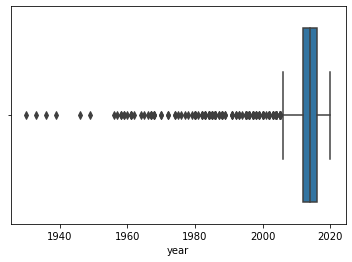

In [14]:
#boxplot
sns.boxplot(x=movies_df['year'])

In [15]:
#filtering the data to recent years
movies_df = movies_df[movies_df['year'] > 2011]

In [16]:
sns.set_theme(style="whitegrid")

<AxesSubplot:xlabel='year', ylabel='count'>

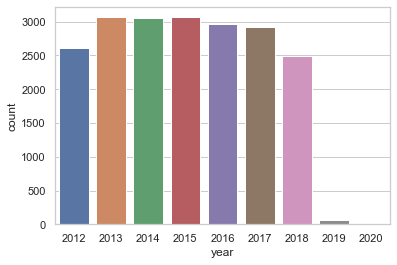

In [17]:
sns.countplot(x=movies_df['year'])

<AxesSubplot:xlabel='year', ylabel='popularity'>

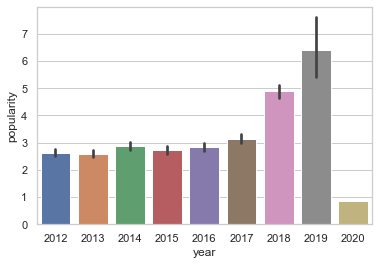

In [18]:
sns.barplot(data=movies_df, x="year", y="popularity")

2019 has the least number of movies according to the countplot but on looking at popularity plot, it has the highest popularity

In [19]:
movies_df.describe()

,popularity,vote_average,vote_count,year,month
count,20250.000000,20250.000000,20250.000000,20250.000000,20250.000000
mean,3.074155,6.021916,175.914074,2014.976691,6.399358
std,4.362412,1.891991,911.515740,1.949926,3.534939
min,0.600000,0.000000,1.000000,2012.000000,1.000000
25%,0.600000,5.000000,1.000000,2013.000000,3.000000
50%,1.338000,6.000000,5.000000,2015.000000,6.000000
75%,3.552000,7.000000,25.000000,2017.000000,10.000000
max,80.773000,10.000000,20175.000000,2020.000000,12.000000


In [20]:
#looking into movies from 2019 
movies_2019=movies_df.loc[(movies_df.year == 2019)]
movies_2019

,popularity,release_date,movie_title,vote_average,vote_count,year,month
20633,28.138,2019-01-11,The Upside,7.3,274,2019,1
22413,1.138,2019-01-18,Don't Come Back from the Moon,4.5,3,2019,1
23249,0.600,2019-03-12,Avenues,8.0,1,2019,3
23930,17.182,2019-04-19,Under the Silver Lake,6.4,338,2019,4
23945,16.574,2019-03-01,Climax,7.3,352,2019,3
...,...,...,...,...,...,...,...
25429,2.024,2019-02-22,Bilby,5.0,6,2019,2
25652,1.680,2019-03-09,Incel,0.0,1,2019,3
25694,1.617,2019-04-10,Savage,2.8,7,2019,4
26059,0.828,2019-03-08,We Are Boats,4.5,2,2019,3


In [21]:
#sorting movies from 2019 by popularity
movies_2019.sort_values(by='popularity', ascending=False)

,popularity,release_date,movie_title,vote_average,vote_count,year,month
20633,28.138,2019-01-11,The Upside,7.3,274,2019,1
23930,17.182,2019-04-19,Under the Silver Lake,6.4,338,2019,4
23945,16.574,2019-03-01,Climax,7.3,352,2019,3
23947,16.389,2019-03-22,Dragged Across Concrete,6.6,127,2019,3
24003,14.028,2019-05-17,We Have Always Lived in the Castle,5.2,24,2019,5
...,...,...,...,...,...,...,...
25694,1.617,2019-04-10,Savage,2.8,7,2019,4
22413,1.138,2019-01-18,Don't Come Back from the Moon,4.5,3,2019,1
26059,0.828,2019-03-08,We Are Boats,4.5,2,2019,3
23249,0.600,2019-03-12,Avenues,8.0,1,2019,3


The top 5 most popular are mainly Comedy Drama

In [22]:
movies_2013 = movies_df.loc[(movies_df.year == 2013)]
movies_2013

,popularity,release_date,movie_title,vote_average,vote_count,year,month
1537,0.802,2013-04-05,Stranger Things,8.0,14,2013,4
3084,3.888,2013-04-25,Vampire,6.2,20,2013,4
3503,1.894,2013-03-22,Dorfman in Love,5.8,20,2013,3
3687,1.400,2013-08-13,Love on a Leash,10.0,7,2013,8
4086,0.873,2013-11-01,Sal,4.8,4,2013,11
...,...,...,...,...,...,...,...
11014,0.600,2013-11-05,2CELLOS (Sulic & Hauser) Live at Arena Zagreb,0.0,1,2013,11
11015,0.600,2013-10-27,Cost of the Living: A Zom Rom Com,0.0,1,2013,10
11016,0.600,2013-10-10,Bryan Adams: Live at the Sydney Opera House,0.0,1,2013,10
11017,0.600,2013-07-31,Eco Migrants: The Case of Bhola Island,0.0,1,2013,7


<AxesSubplot:xlabel='year'>

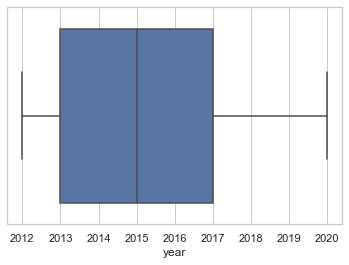

In [23]:
#boxplot
sns.boxplot(x=movies_df['year'])

In [24]:
#sorting the movies in terms of popularity
movies_df = movies_df.sort_values(by='popularity', ascending=False)

In [25]:
movies_df.head(10)

,popularity,release_date,movie_title,vote_average,vote_count,year,month
23811,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,2018,4
11019,78.123,2014-10-24,John Wick,7.2,10081,2014,10
23812,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048,2018,12
11020,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392,2014,12
5179,50.289,2012-05-04,The Avengers,7.6,19673,2012,5
11021,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958,2014,8
20617,48.571,2017-10-06,Blade Runner 2049,7.4,6679,2017,10
23814,48.508,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald,6.9,4870,2018,11
23815,48.057,2018-11-21,Ralph Breaks the Internet,7.2,2626,2018,11
20618,46.775,2017-07-07,Spider-Man: Homecoming,7.4,11585,2017,7


from above we can see that the top 10 most popular movies:
-have action in them.
-they are science fiction.
-most involve superheroes.
-they are fantacy movies.
-they are adventurous.

In [26]:
movies_df['month'].value_counts()

10    2327
1     2233
4     2017
3     1897
9     1726
6     1679
11    1673
5     1478
12    1463
8     1334
2     1253
7     1170
Name: month, dtype: int64

<AxesSubplot:xlabel='Month Number', ylabel='Count'>

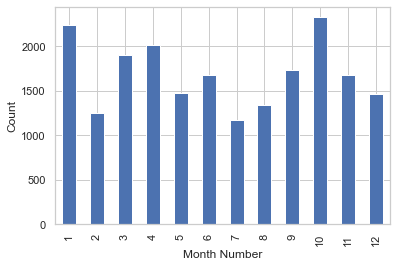

In [27]:
#plotting movies value_count against month number
movies_df['month'].value_counts().loc[[1,2,3,4,5,6,7,8,9,10,11,12]].plot.bar(xlabel='Month Number',ylabel="Count")


<AxesSubplot:xlabel='Month_number'>

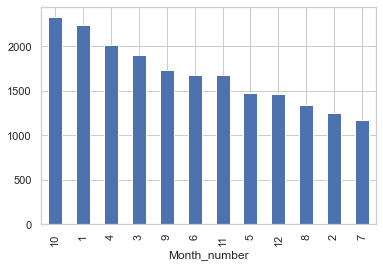

In [28]:
#plotting movies value_count against month number
movies_df['month'].value_counts().plot(kind='bar', xlabel = 'Month_number')



From the above boxplot, we can see that most movies are released on the 10th month

<AxesSubplot:xlabel='month', ylabel='popularity'>

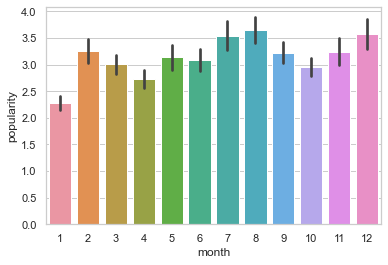

In [29]:
#now plotting month against popularity
sns.barplot(data=movies_df, x="month", y="popularity")

Here we see that the most popular movies were released on the 8th month

In [30]:
#loading data with genres and merging with movies_df
title_df = pd.read_csv("zippedData/imdb.title.basics.csv.gz")
title_df


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [31]:
title_df=title_df.rename(columns = {'original_title': 'movie_title', 'start_year':'year'})

In [32]:
title_df.drop(['primary_title','runtime_minutes'], axis=1, inplace=True)

In [33]:
title_df.isnull().sum()

tconst            0
movie_title      21
year              0
genres         5408
dtype: int64

In [34]:
title_df.dropna()

,tconst,movie_title,year,genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,Ashad Ka Ek Din,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,La Telenovela Errante,2017,"Comedy,Drama,Fantasy"
...,...,...,...,...
146138,tt9916428,The Secret of China,2019,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,2019,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary
146141,tt9916706,Dankyavar Danka,2013,Comedy


In [35]:
title_df.duplicated().sum()

0

In [36]:
#merging the two data frames on movie title
merged_df=pd.merge(movies_df, title_df, on = 'movie_title')
merged_df

,popularity,release_date,movie_title,vote_average,vote_count,year_x,month,tconst,year_y,genres
0,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,2018,4,tt4154756,2018,"Action,Adventure,Sci-Fi"
1,78.123,2014-10-24,John Wick,7.2,10081,2014,10,tt2911666,2014,"Action,Crime,Thriller"
2,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048,2018,12,tt4633694,2018,"Action,Adventure,Animation"
3,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392,2014,12,tt2310332,2014,"Adventure,Fantasy"
4,50.289,2012-05-04,The Avengers,7.6,19673,2012,5,tt0848228,2012,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...
16517,0.600,2016-08-12,Sole Proprietor,5.5,2,2016,8,tt1733729,2016,"Action,Crime,Drama"
16518,0.600,2016-10-31,Asian Ghost Story,5.5,2,2016,10,tt5703622,2016,"Action,Horror"
16519,0.600,2016-11-15,Santa's Boot Camp,5.5,2,2016,11,tt2331053,2016,"Adventure,Comedy,Family"
16520,0.600,2016-01-01,Blow a Kiss,5.5,2,2016,1,tt6037626,2017,"Action,Crime"


In [37]:
merged_df=merged_df.rename(columns={'year_y':'release_year'})

In [38]:
merged_df=merged_df.drop(['year_x'],axis=1)

In [39]:
merged_df

,popularity,release_date,movie_title,vote_average,vote_count,month,tconst,release_year,genres
0,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,4,tt4154756,2018,"Action,Adventure,Sci-Fi"
1,78.123,2014-10-24,John Wick,7.2,10081,10,tt2911666,2014,"Action,Crime,Thriller"
2,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048,12,tt4633694,2018,"Action,Adventure,Animation"
3,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392,12,tt2310332,2014,"Adventure,Fantasy"
4,50.289,2012-05-04,The Avengers,7.6,19673,5,tt0848228,2012,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...
16517,0.600,2016-08-12,Sole Proprietor,5.5,2,8,tt1733729,2016,"Action,Crime,Drama"
16518,0.600,2016-10-31,Asian Ghost Story,5.5,2,10,tt5703622,2016,"Action,Horror"
16519,0.600,2016-11-15,Santa's Boot Camp,5.5,2,11,tt2331053,2016,"Adventure,Comedy,Family"
16520,0.600,2016-01-01,Blow a Kiss,5.5,2,1,tt6037626,2017,"Action,Crime"


In [40]:
merged_df.isnull().sum()

popularity        0
release_date      0
movie_title       0
vote_average      0
vote_count        0
month             0
tconst            0
release_year      0
genres          249
dtype: int64

In [41]:
merged_df=merged_df.dropna()

In [42]:
#checking for duplicates
merged_df.duplicated().sum()

0

In [43]:
merged_df['genres'].value_counts()

Drama                           1911
Documentary                     1783
Horror                           787
Comedy                           654
Comedy,Drama                     517
                                ... 
Horror,Sci-Fi,War                  1
Documentary,History,Romance        1
Adventure,Documentary,Sci-Fi       1
Horror,Romance                     1
Crime,Musical                      1
Name: genres, Length: 592, dtype: int64

In [44]:
#filtering the genres counts to greater than 10
merged_df=merged_df[merged_df['genres'].map(merged_df['genres'].value_counts()) > 10]
merged_df

,popularity,release_date,movie_title,vote_average,vote_count,month,tconst,release_year,genres
0,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,4,tt4154756,2018,"Action,Adventure,Sci-Fi"
1,78.123,2014-10-24,John Wick,7.2,10081,10,tt2911666,2014,"Action,Crime,Thriller"
2,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048,12,tt4633694,2018,"Action,Adventure,Animation"
4,50.289,2012-05-04,The Avengers,7.6,19673,5,tt0848228,2012,"Action,Adventure,Sci-Fi"
5,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958,8,tt2015381,2014,"Action,Adventure,Comedy"
...,...,...,...,...,...,...,...,...,...
16517,0.600,2016-08-12,Sole Proprietor,5.5,2,8,tt1733729,2016,"Action,Crime,Drama"
16518,0.600,2016-10-31,Asian Ghost Story,5.5,2,10,tt5703622,2016,"Action,Horror"
16519,0.600,2016-11-15,Santa's Boot Camp,5.5,2,11,tt2331053,2016,"Adventure,Comedy,Family"
16520,0.600,2016-01-01,Blow a Kiss,5.5,2,1,tt6037626,2017,"Action,Crime"


In [45]:
merged_df['genres'].value_counts()

Drama                     1911
Documentary               1783
Horror                     787
Comedy                     654
Comedy,Drama               517
                          ... 
Action,Horror,Mystery       11
Action,Biography,Crime      11
Comedy,Music,Romance        11
Adventure,Comedy,Crime      11
Adventure,Drama,Horror      11
Name: genres, Length: 189, dtype: int64

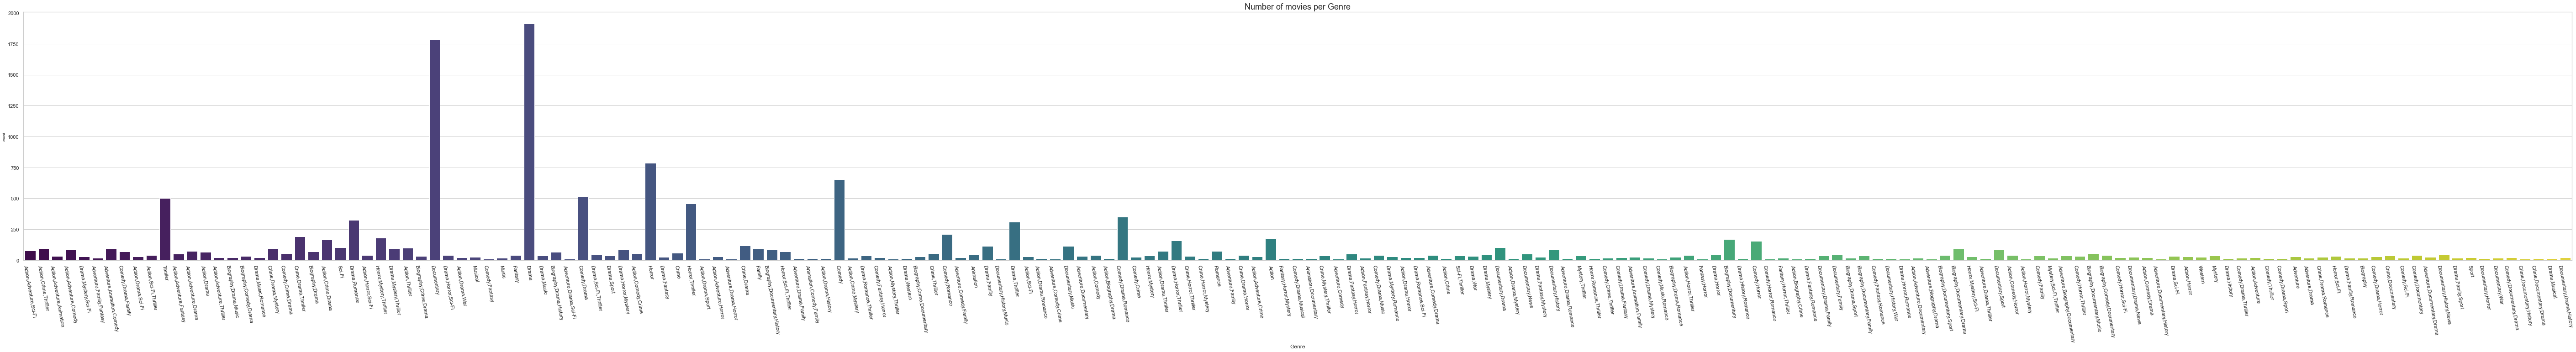

In [46]:
plt.figure(figsize=(100,10))
sns.countplot(x='genres', data=merged_df, palette='viridis')
plt.title('Number of movies per Genre', fontsize=18)
plt.ylabel('count', fontsize=8)
plt.xlabel('Genre', fontsize=12)
plt.xticks(rotation=-80)
plt.show()

In [47]:
genre=["Action","Comedy","Thriller","Adventure","Horror","Drama","Fantacy","Sci-Fi","Romance","Comedy,Drama","Documentary"]
merged_df_genre=merged_df.loc[merged_df['genres'].isin(genre)]
merged_df_genre

,popularity,release_date,movie_title,vote_average,vote_count,month,tconst,release_year,genres
17,44.007,2018-10-05,Venom,6.6,6206,10,tt1931601,2011,Thriller
65,31.618,2017-06-02,Wonder Woman,7.3,12566,6,tt4028068,2014,Sci-Fi
68,2.841,2013-09-29,Wonder Woman,5.9,34,9,tt4028068,2014,Sci-Fi
90,29.154,2018-04-06,A Quiet Place,7.3,5848,4,tt6347308,2016,Documentary
99,29.056,2015-03-13,Cinderella,6.7,4517,3,tt8907882,2018,Drama
...,...,...,...,...,...,...,...,...,...
16501,0.600,2016-01-24,Driftwood,6.0,1,1,tt10466584,2020,Drama
16503,0.600,2016-01-24,Driftwood,6.0,1,1,tt5771222,2016,Drama
16506,0.600,2016-03-05,According to Her,5.2,4,3,tt2933632,2016,"Comedy,Drama"
16508,0.600,2016-01-21,Video,5.3,2,1,tt3990582,2014,Thriller


In [48]:
merged_df_genre['movie_title'].duplicated().sum()

1754

In the merged_df_genre, we can notice some repeated movie_titles but movies were released on different years, its like the latest release is an improved version of the former

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Thriller'),
  Text(1, 0, 'Sci-Fi'),
  Text(2, 0, 'Documentary'),
  Text(3, 0, 'Drama'),
  Text(4, 0, 'Comedy,Drama'),
  Text(5, 0, 'Horror'),
  Text(6, 0, 'Comedy'),
  Text(7, 0, 'Romance'),
  Text(8, 0, 'Action'),
  Text(9, 0, 'Adventure')])

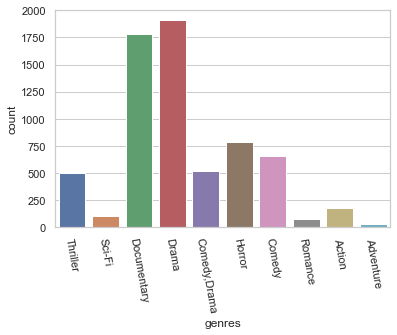

In [49]:
sns.countplot(x=merged_df_genre['genres'])
plt.xticks(rotation=-80);

From the above plots we can see that drama genre has the most count.
Next we will look at the gross of each genre

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Thriller'),
  Text(1, 0, 'Sci-Fi'),
  Text(2, 0, 'Documentary'),
  Text(3, 0, 'Drama'),
  Text(4, 0, 'Comedy,Drama'),
  Text(5, 0, 'Horror'),
  Text(6, 0, 'Comedy'),
  Text(7, 0, 'Romance'),
  Text(8, 0, 'Action'),
  Text(9, 0, 'Adventure')])

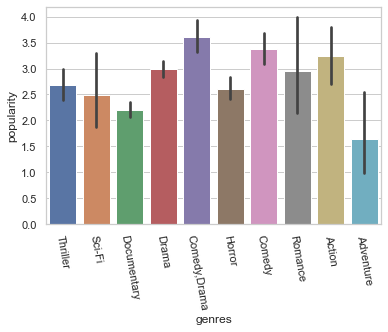

In [50]:
sns.barplot(data=merged_df_genre, x="genres", y="popularity")
plt.xticks(rotation=-80);

# Changing data types run 

from the analysis above; the data types produ, domes,and gross 
* are on object type, to work with the data 
* remove characters , 
* dollar sign and 
* change to to float object

In [51]:
budgets_df=pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [52]:
budgets_df=budgets_df.rename(columns={'movie':'movie_title'})

In [53]:
budgets_df

,id,release_date,movie_title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [54]:
budgets_df['production_budget'].replace(",", "", inplace=True, regex=True)


In [55]:
budgets_df.production_budget = budgets_df.production_budget.str.strip('$')

In [56]:
# change data types
def change_data_type(data, cols, type):
    """Simple function to change columns data type"""
    for col in cols:
        data[col] = data[col].astype(type)

    return data.dtypes # confirm the data types


change_data_type(budgets_df, ["production_budget"], 'float')

id                     int64
release_date          object
movie_title           object
production_budget    float64
domestic_gross        object
worldwide_gross       object
dtype: object

In [57]:
budgets_df['domestic_gross'].replace(",", "", inplace=True, regex=True)
budgets_df['worldwide_gross'].replace(",", "", inplace=True, regex=True)

In [58]:
budgets_df.domestic_gross = budgets_df.domestic_gross.str.strip('$')
budgets_df.worldwide_gross = budgets_df.worldwide_gross.str.strip('$')

In [59]:
change_data_type(budgets_df, ["domestic_gross"],'float')

id                     int64
release_date          object
movie_title           object
production_budget    float64
domestic_gross       float64
worldwide_gross       object
dtype: object

In [60]:
change_data_type(budgets_df, ["worldwide_gross"],'float')

id                     int64
release_date          object
movie_title           object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object

In [61]:
budgets_df.drop("release_date",axis=1)

,id,movie_title,production_budget,domestic_gross,worldwide_gross
0,1,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...
5777,78,Red 11,7000.0,0.0,0.000000e+00
5778,79,Following,6000.0,48482.0,2.404950e+05
5779,80,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,A Plague So Pleasant,1400.0,0.0,0.000000e+00


The values are still in dollars eventhough we removed the $ sign

In [62]:
#statistical data
budgets_df.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


In [63]:
print(budgets_df['production_budget'].mean())
print(budgets_df['production_budget'].median())

31587757.0965064
17000000.0


In [67]:
#changing the values into millions
budgets_df['production_budget'] = budgets_df['production_budget'].astype(float)/1000000

In [69]:
budgets_df['domestic_gross'] = budgets_df['domestic_gross'].astype(float)/1000000
budgets_df['worldwide_gross'] = budgets_df['worldwide_gross'].astype(float)/1000000


In [70]:
#values in dollars per million
budgets_df

,id,release_date,movie_title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425.0000,760.507625,2776.345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410.6000,241.063875,1045.663875
2,3,"Jun 7, 2019",Dark Phoenix,350.0000,42.762350,149.762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330.6000,459.005868,1403.013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317.0000,620.181382,1316.721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,0.0070,0.000000,0.000000
5778,79,"Apr 2, 1999",Following,0.0060,0.048482,0.240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,0.0050,0.001338,0.001338
5780,81,"Sep 29, 2015",A Plague So Pleasant,0.0014,0.000000,0.000000


In [71]:
#merging mov_gross to merged df
merged2_df=pd.merge(merged_df_genre,budgets_df, on='movie_title')

In [72]:
merged2_df

,popularity,release_date_x,movie_title,vote_average,vote_count,month,tconst,release_year,genres,id,release_date_y,production_budget,domestic_gross,worldwide_gross
0,44.007,2018-10-05,Venom,6.6,6206,10,tt1931601,2011,Thriller,3,"Oct 5, 2018",116.0,213.511408,853.628605
1,44.007,2018-10-05,Venom,6.6,6206,10,tt1931601,2011,Thriller,14,"Sep 16, 2005",25.0,0.881745,0.881745
2,31.618,2017-06-02,Wonder Woman,7.3,12566,6,tt4028068,2014,Sci-Fi,55,"Jun 2, 2017",150.0,412.563408,821.133378
3,2.841,2013-09-29,Wonder Woman,5.9,34,9,tt4028068,2014,Sci-Fi,55,"Jun 2, 2017",150.0,412.563408,821.133378
4,29.154,2018-04-06,A Quiet Place,7.3,5848,4,tt6347308,2016,Documentary,66,"Apr 6, 2018",17.0,188.024361,334.522294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,0.600,2016-04-17,The Return,7.0,2,4,tt9664284,2018,Drama,43,"Feb 6, 2004",15.0,0.501752,5.953886
1027,0.600,2013-09-24,Unstoppable,1.6,4,9,tt3070502,2013,Documentary,19,"Nov 12, 2010",95.0,81.562942,165.720921
1028,0.600,2013-09-24,Unstoppable,1.6,4,9,tt7098772,2017,Documentary,19,"Nov 12, 2010",95.0,81.562942,165.720921
1029,0.600,2013-09-24,Unstoppable,1.6,4,9,tt9499562,2017,Documentary,19,"Nov 12, 2010",95.0,81.562942,165.720921


In [73]:
merged2_df.drop("release_date_x", axis=1,inplace=True)

In [74]:
merged2_df=merged2_df.drop_duplicates(subset='movie_title', keep="first")
merged2_df

,popularity,movie_title,vote_average,vote_count,month,tconst,release_year,genres,id,release_date_y,production_budget,domestic_gross,worldwide_gross
0,44.007,Venom,6.6,6206,10,tt1931601,2011,Thriller,3,"Oct 5, 2018",116.000,213.511408,853.628605
2,31.618,Wonder Woman,7.3,12566,6,tt4028068,2014,Sci-Fi,55,"Jun 2, 2017",150.000,412.563408,821.133378
4,29.154,A Quiet Place,7.3,5848,4,tt6347308,2016,Documentary,66,"Apr 6, 2018",17.000,188.024361,334.522294
5,29.056,Cinderella,6.7,4517,3,tt8907882,2018,Drama,13,"Mar 13, 2015",95.000,201.151353,534.551353
9,28.138,The Upside,7.3,274,1,tt1987680,2017,"Comedy,Drama",85,"Jan 11, 2019",37.500,108.235497,119.024536
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,0.600,1982,7.5,2,12,tt2388621,2013,Drama,23,"Mar 1, 2016",1.000,0.000000,0.000000
1015,0.600,Emily,7.0,1,6,tt1863224,2011,Drama,45,"Jan 27, 2017",0.027,0.003547,0.003547
1018,0.600,Open Secret,7.0,1,11,tt1739304,2011,Documentary,97,"Mar 25, 2015",0.100,0.000000,0.000000
1019,0.600,The Return,7.0,2,4,tt3387284,2014,Documentary,43,"Feb 6, 2004",15.000,0.501752,5.953886


In [75]:
#sorting the values 
merged2_df.sort_values("production_budget",ascending=False)

,popularity,movie_title,vote_average,vote_count,month,tconst,release_year,genres,id,release_date_y,production_budget,domestic_gross,worldwide_gross
28,18.908,Brave,6.9,8116,6,tt8358722,2014,Drama,77,"Jun 22, 2012",185.000,237.282182,554.606532
10,25.961,Coco,8.2,8669,11,tt7002100,2017,Horror,2,"Nov 22, 2017",175.000,209.726015,798.008101
16,24.797,Inside Out,8.0,12691,6,tt2064820,2011,Drama,98,"Jun 19, 2015",175.000,356.461711,854.235992
24,20.136,Tomorrowland,6.2,4610,5,tt7728220,2017,Documentary,23,"May 22, 2015",170.000,93.436322,206.627518
2,31.618,Wonder Woman,7.3,12566,6,tt4028068,2014,Sci-Fi,55,"Jun 2, 2017",150.000,412.563408,821.133378
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,0.600,Her Cry: La Llorona Investigation,5.0,2,4,tt2469216,2013,Horror,35,"Oct 25, 2013",0.035,0.000000,0.000000
694,5.288,Krisha,6.8,86,3,tt4266638,2015,Drama,38,"Mar 18, 2016",0.030,0.144822,0.144822
1015,0.600,Emily,7.0,1,6,tt1863224,2011,Drama,45,"Jan 27, 2017",0.027,0.003547,0.003547
672,5.934,Exeter,4.7,121,3,tt2782686,2014,Horror,49,"Sep 1, 2015",0.025,0.000000,0.489792


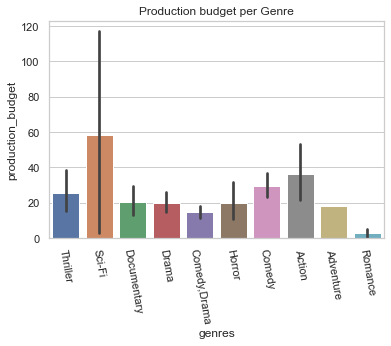

In [80]:
#plotting genre and production_budget
sns.barplot(data=merged2_df, x="genres", y="production_budget")
plt.title("Production budget per Genre")
plt.xticks(rotation=-80);

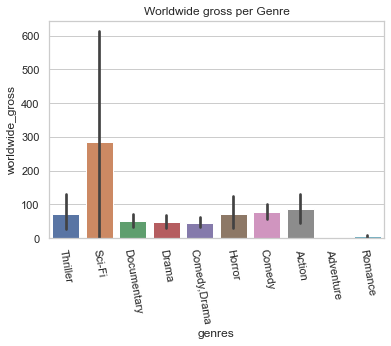

In [95]:
sns.barplot(data=merged2_df, x="genres", y="worldwide_gross")
plt.title("Worldwide gross per Genre")
plt.xticks(rotation=-80);

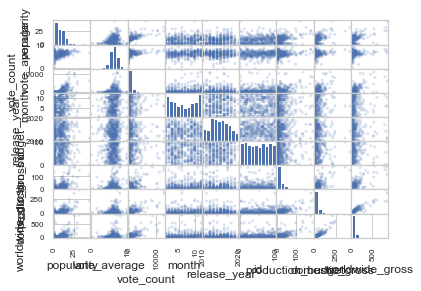

In [82]:
pd.plotting.scatter_matrix(merged2_df, alpha=0.2);

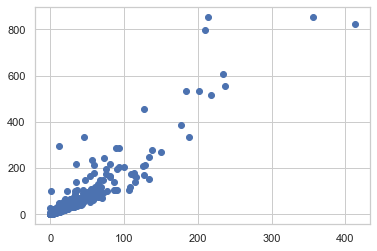

In [88]:
domestic_gross= merged2_df["domestic_gross"]
worldwide_gross= merged2_df["worldwide_gross"]

plt.scatter(domestic_gross, worldwide_gross)
plt.show()

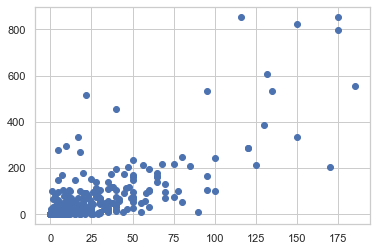

In [96]:
production_budget= merged2_df["production_budget"]
plt.scatter(production_budget, worldwide_gross)
plt.show()

# conclusion:

### On movie genres that are currently doing the best at box office;
* Sci-Fi movies have the highest production_budget and worldwide_gross
* Drama movie are the most popular, that is the most watched.
### On estimation of the production budget:
* low production budget implies low worldwide gross. Thus to obtain high worldwide gross, we need to highly invest on production budget. 
* high production budget implies high movie quality thus high worldwide gross
### On movie title;
* A capturing movie title attracts more popularity compaired to a plain one.

# Recommendation:

1. From the analysis, the company should invest in Sci-Fi for profit gains.

2. The company should greatly invest in the production budget because it determines the movie quality and worldwide gross. A high investment results in high worldwide gross

3. The company should come up with a capturing and interesting movie title for the movie to gain popularity. 